<a href="https://colab.research.google.com/github/kyu30/NBAContractStats/blob/main/NBAContractsandStats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import io
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
uploaded = files.upload()

Saving nba_2022-23_all_stats_with_salary_final.csv to nba_2022-23_all_stats_with_salary_final.csv


In [ ]:
df = pd.read_csv('nba_2022-23_all_stats_with_salary_final.csv', index_col = 'Unnamed: 0')

In [ ]:
# Creating a metric to measure player production over the course of a season
def seasonScore (datfram, Player):
  newdf = datfram[datfram['Player Name'] == Player]
  score = newdf['PTS'] + 0.4 * newdf['FG'] - 0.7 * newdf['FGA'] - 0.4*(newdf['FTA'] - newdf['FT']) + 0.7 * newdf['ORB'] + 0.3 * newdf['DRB'] + newdf['STL'] + 0.7 * newdf['AST'] + 0.7 * newdf['BLK'] - 0.4 * newdf['PF'] - newdf['TOV']
  score += newdf['GP']/82
  score = score.values
  score = score.round(2)
  return score

In [ ]:
score = []
for index,row in df.iterrows():
  player = row['Player Name']
  score.append(seasonScore(df,player))
df['Season Score'] = score
df['Season Score'] = df['Season Score'].astype(float)
#df.dtypes

In [ ]:
#df['Season Score'] = df['Season Score'].str[0:-1]
df.index = df['Player Name']
#df = df.drop(['Player Name'], axis = 1)
df = df.drop(['FG', 'FG%', '2P', 'FTr', 'ORB%', 'DRB%', 'OWS','Total Minutes',  'WS/48', 'GS', 'PF', 'TS%', 'eFG%'], axis =1)
df = df.drop(['STL%', 'BLK%', 'TOV%','TRB%'], axis =1)

In [ ]:
avgScore = df['Season Score'].mean()
scoreDiff = []
for index, row in df.iterrows():
  scoreDiff.append((row['Season Score']-avgScore).round(2))
df['ScoreDiff'] = scoreDiff

In [ ]:
# Creating a metric comparing a player's contract to his production over a season
def ContractValue (datfram, player):
  conval = (((datfram.loc[player,'Season Score'] + datfram.loc[player,'ScoreDiff'])/ datfram.loc[player,'Salary']))*10**5
  return conval

In [ ]:
conval = []
for index,row in df.iterrows():
  conval.append(ContractValue(df,index).round(3))
df['Contract Value'] = conval

In [ ]:
salaries = df.loc[:,'Salary']
SeaScore = df.loc[:,'Season Score']
#plt.plot(SeaScore, salaries,'o')
df2 = {'Salary': df['Salary'], 'Season Score': df['Season Score']}

In [ ]:
str1 = "LeBron James, Giannis Antetokounmpo, Jayson Tatum, Donovan Mitchell, Kyrie Irving, Luka Doncic, Nikola Jokic, Joel Embiid, Ja Morant, Lauri Markkanen, Bam Adebayo, Jaylen Brown, DeMar DeRozan, Tyrese Haliburton, Jrue Holiday, Julius Randle, Pascal Siakam, Anthony Edwards, Paul George, Shai Gilgeous-Alexander, Jaren Jackson Jr., Damian Lillard, Domantas Sabonis, Jaylen Brown, Stephen Curry, Luka Doncic, Anthony Edwards, Joel Embiid, Paul George, Tyrese Haliburton, Kyrie Irving, Jaren Jackson Jr., LeBron James, Nikola Jokic, Julius Randle, Zion Williamson, Bam Adebayo, Giannis Antetokounmpo, DeMar DeRozan, Kevin Durant, Shai Gilgeous-Alexander, Jrue Holiday, Damian Lillard, Lauri Markkanen, Donovan Mitchell, Ja Morant, Domantas Sabonis, Pascal Siakam, Jayson Tatum, Jarrett Allen, Giannis Antetokounmpo, Jimmy Butler, Stephen Curry, DeMar DeRozan, Luka Doncic, Darius Garland, Draymond Green, James Harden, LeBron James, Nikola Jokic, Donovan Mitchell, Chris Paul, Fred VanVleet, LaMelo Ball, Devin Booker, Kevin Durant, Joel Embiid, Rudy Gobert, Zach LaVine, Khris Middleton, Ja Morant, Dejounte Murray, Jayson Tatum, Karl-Anthony Towns, Andrew Wiggins, Trae Young, Bradley Beal, Devin Booker, Mike Conley, Kevin Durant, Joel Embiid, James Harden, Kyrie Irving, Zach LaVine, Kawhi Leonard, Donovan Mitchell, Julius Randle, Jayson Tatum, Nikola Vucevic, Zion Williamson, Giannis Antetokounmpo, Jaylen Brown, Stephen Curry, Anthony Davis, Luka Doncic, Paul George, Rudy Gobert, LeBron James, Nikola Jokic, Damian Lillard, Chris Paul, Domantas Sabonis, Ben Simmons"
str2 = """
Shai Gilgeous-Alexander
Luka Doncic
Joel Embiid
Jayson Tatum
Giannis Antetokounmpo
Stephen Curry
Donovan Mitchell
Jimmy Butler
Nikola Jokic
Jaylen Brown
Damian Lillard
De'Aaron Fox
LeBron James
Julius Randle
Domantas Sabonis
Giannis Antetokounmpo
Jayson Tatum
Nikola Jokic
Devin Booker
Luka Doncic
Stephen Curry
Ja Morant
Kevin Durant
DeMar DeRozan
Joel Embiid
Trae Young
Chris Paul
LeBron James
Pascal Siakam
Karl-Anthony Towns
Stephen Curry
Luka Doncic
Kawhi Leonard
Nikola Jokic
Giannis Antetokounmpo
Damian Lillard
Joel Embiid
Chris Paul
Julius Randle
LeBron James
Rudy Gobert
Jimmy Butler
Paul George
Bradley Beal
Kyrie Irving"""

In [ ]:
allstar = str1.split(', ')
allnba = str2.split('\n')
stars = allstar + allnba
def dupe_check(lst1):
  newstr = []
  for player in lst1:
    player = player.strip()
    if player not in newstr:
      newstr.append(player)
  return newstr
stars = dupe_check(stars)

In [ ]:
starcheck = []
for index, rows in df.iterrows():
  if index in stars:
    starcheck.append(True)
  else:
    starcheck.append(False)
df['Star'] = starcheck

In [ ]:
stars = df[df['Star'] == True]
stars.drop(['Star'], axis = 1)

# Graphs

In [ ]:
SeaScore = df['Season Score']
SeaScore2 = stars['Season Score']
Salary = df['Salary']
Salary2 = stars['Salary']
plt.xlabel('Season Score', fontsize=10)
plt.ylabel('Salary', fontsize=10)
plt.plot(SeaScore, Salary, 'o')
plt.plot(SeaScore2, Salary2, 'or')

In [ ]:
# Graphically comparing player perfomance to player salary, allows viewers to identify best and worst value contracts in the NBA
# Best Value: Tyrese Haliburton
# Worst Value: John Wall
import plotly.express as px

fig = px.scatter(df, x="Season Score", y="Salary", log_x=True,
                 hover_name="Player Name", hover_data=["Season Score", "Salary"])

# Graphing performance vs contract for All-Stars from the last three years
fig2 = px.scatter(stars, x="Season Score", y="Salary", log_x=True,
                 hover_name="Player Name", hover_data=["Season Score", "Salary"])

fig.show()
fig2.show()

In [ ]:
# Filtering to find consistently high-performing players in the last season
df=df.drop(['Player Name'], axis =1)
df[(df['Season Score'] >= df['Season Score'].quantile(.85)) & ( df['GP'] >= df['GP'].quantile(.45))]


,Salary,Position,Age,Team,GP,MP,FGA,3P,3PA,3P%,...,DWS,WS,OBPM,DBPM,BPM,VORP,Season Score,ScoreDiff,Contract Value,Star
Player Name,,,,,,,,,,,,,,,,,,,,,
Stephen Curry,48070014,PG,34,GSW,56,34.7,20.2,4.9,11.4,0.427,...,2.0,7.8,7.5,0.1,7.5,4.7,23.44,15.45,0.081,True
LeBron James,44474988,PF,38,LAL,55,35.5,22.2,2.2,6.9,0.321,...,2.4,5.6,5.5,0.6,6.1,4.0,23.16,15.17,0.086,True
Kawhi Leonard,42492492,SF,31,LAC,52,33.6,16.8,2.0,4.8,0.416,...,2.2,7.1,5.1,0.9,6.1,3.5,20.36,12.37,0.077,True
Paul George,42492492,SF,32,LAC,56,34.6,17.9,2.8,7.6,0.371,...,2.3,4.6,2.4,0.3,2.8,2.3,18.23,10.24,0.067,True
Giannis Antetokounmpo,42492492,PF,28,MIL,63,32.1,20.3,0.7,2.7,0.275,...,3.7,8.6,5.8,2.7,8.5,5.4,25.01,17.02,0.099,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Desmond Bane,2130240,SG,24,MEM,58,31.7,16.2,2.9,7.0,0.408,...,2.3,5.8,3.3,0.1,3.5,2.5,16.73,8.74,1.196,False
Luka Doncic,37096500,PG-SG,24,DAL,66,36.2,22.0,2.8,8.2,0.342,...,2.9,10.2,7.6,1.4,8.9,6.6,26.73,18.74,0.123,True
Nikola Jokic,33047803,C,28,DEN,69,33.7,14.8,0.8,2.2,0.383,...,3.8,14.9,8.5,4.5,13.0,8.8,26.85,18.86,0.138,True


# Sorting players by roles using their stats


Bigs

In [ ]:
def avgSalary(data):
  return data['Salary'].mean().round(2)
RolesList = {}

In [ ]:
Bigs = df[(df['Position'] == 'C') | (df['Position'] == 'PF') | (df['Position'] == 'C-PF') | (df['Position'] == 'PF-C')]

In [ ]:
#Bigs (PF, C)
Q1blkCPF = Bigs['BLK'].quantile(0.25)
Q3blkCPF = Bigs['BLK'].quantile(0.75)
IQRblkCPF = Q3blkCPF - Q1blkCPF
meanblkCPF = Bigs['BLK'].mean()

In [ ]:
Q1ptsCPF = Bigs['PTS'].quantile(0.25)
Q3ptsCPF = Bigs['PTS'].quantile(0.75)
IQRptsCPF = Q3ptsCPF - Q1ptsCPF
meanptsCPF = Bigs['PTS'].mean()

In [ ]:
Q1rebCPF = Bigs['TRB'].quantile(0.25)
Q3rebCPF = Bigs['TRB'].quantile(0.75)
IQRrebCPF = Q3rebCPF - Q1rebCPF
meanrebCPF = Bigs['TRB'].mean()

In [ ]:
Q1fgaCPF = Bigs['FGA'].quantile(0.25)
Q3fgaCPF = Bigs['FGA'].quantile(0.75)
IQRfgaCPF = Q3fgaCPF - Q1fgaCPF
meanfgaCPF = Bigs['FGA'].mean()

In [ ]:
Q1cvalCPF = Bigs['Contract Value'].quantile(0.25)
Q3cvalCPF = Bigs['Contract Value'].quantile(0.75)
IQRcvalCPF = Q3cvalCPF - Q1cvalCPF
meancvalCPF = Bigs['Contract Value'].mean()

In [ ]:
#Scoring Bigs
ScoringBigs = df[(df['GP'] >= df['GP'].mean()) & ((df['Position'] == 'C') | (df['Position'] == 'PF') | (df['Position'] == 'C-PF') | (df['Position'] == 'PF-C')) & (df['PTS'] >= Q3ptsCPF + 1.5 * IQRptsCPF) & (df['FGA'] >= Q3fgaCPF + 1.5 * IQRfgaCPF)]
RolesList['SB'] = (avgSalary(ScoringBigs))

In [ ]:
#Defensive Bigs
DefensiveBigs = df[(df['GP'] >= df['GP'].mean()) & ((df['Position'] == 'C') | (df['Position'] == 'PF') | (df['Position'] == 'C-PF') | (df['Position'] == 'PF-C')) & (df['BLK'] >= Q3blkCPF + .75 * IQRblkCPF) & (df['TRB'] >= Q3rebCPF + .75 * IQRrebCPF)]
RolesList['DB'] = (avgSalary(DefensiveBigs))

Guards

In [ ]:
Guards = df[(df['Position'] == 'PG') | (df['Position'] == 'SG') | (df['Position'] == 'PG-SG') | (df['Position'] == 'SG-PG') | (df['Position'] == 'SG-SF') | (df['Position'] == 'SF-SG')]

In [ ]:
#Guards
Q1astG = Guards['AST'].quantile(0.25)
Q3astG = Guards['AST'].quantile(0.75)
IQRastG = Q3astG - Q1astG
meanastG = Guards['AST'].mean()

In [ ]:
Q1tovG = Guards['TOV'].quantile(0.25)
Q3tovG = Guards['TOV'].quantile(0.75)
IQRtovG = Q3tovG - Q1tovG
meantovG = Guards['TOV'].mean()

In [ ]:
Q1rebG = Guards['TRB'].quantile(0.25)
Q3rebG = Guards['TRB'].quantile(0.75)
IQRrebG = Q3rebG - Q1rebG
meanrebG = Guards['TRB'].mean()

In [ ]:
Q1ptsG = Guards['PTS'].quantile(0.25)
Q3ptsG = Guards['PTS'].quantile(0.75)
IQRptsG = Q3ptsG - Q1ptsG
meanptsG = Guards['PTS'].mean()

In [ ]:
Q1stlG = Guards['STL'].quantile(0.25)
Q3stlG = Guards['STL'].quantile(0.75)
IQRstlG = Q3stlG - Q1stlG
meanstlG = Guards['STL'].mean()

In [ ]:
Q1blkG = Guards['BLK'].quantile(0.25)
Q3blkG = Guards['BLK'].quantile(0.75)
IQRblkG = Q3blkG - Q1blkG
meanblkG = Guards['BLK'].mean()

In [ ]:
Q1fgaG = Guards['FGA'].quantile(0.25)
Q3fgaG = Guards['FGA'].quantile(0.75)
IQRfgaG = Q3fgaG - Q1fgaG
meanfgaG = Guards['FGA'].mean()

In [ ]:
Q1cvalG = Guards['Contract Value'].quantile(0.25)
Q3cvalG = Guards['Contract Value'].quantile(0.75)
IQRcvalG = Q3cvalG - Q1cvalG
meancvalG = Guards['Contract Value'].mean()

In [ ]:
#Scoring Guards
ScoringGuards = df[(df['GP'] >= df['GP'].mean()) & ((df['Position'] == 'PG') | (df['Position'] == 'SG') | (df['Position'] == 'PG-SG') | (df['Position'] == 'SG-PG') | (df['Position'] == 'SG-SF') | (df['Position'] == 'SF-SG')) & (df['PTS'] - df['FT'].mean() >= Q3ptsG + IQRptsG) & (df['FGA'] >= Q3fgaG + .75 * IQRfgaG)]
RolesList['SG'] = (avgSalary(ScoringGuards))

In [ ]:
#Distributors
Passers = df[(df['GP'] >= df['GP'].mean()) & ((df['Position'] == 'PG') | (df['Position'] == 'SG') | (df['Position'] == 'PG-SG') | (df['Position'] == 'SG-PG') | (df['Position'] == 'SG-SF') | (df['Position'] == 'SF-SG')) & ((df['AST']/df['TOV']) >= (1 * (Q3astG + 1.5*IQRastG)/(Q3tovG + 1.5*IQRtovG))) & (df['AST%'] >= df['AST%'].quantile(.75) + .5*(df['AST%'].quantile(.75)-df['AST%'].quantile(.25)))]
RolesList['DIST'] = (avgSalary(Passers))

In [ ]:
#Combo Guards
ComboG = df[(df['GP'] >= df['GP'].mean()) & ((df['Position'] == 'PG') | (df['Position'] == 'SG') | (df['Position'] == 'PG-SG') | (df['Position'] == 'SG-PG') | (df['Position'] == 'SG-SF') | (df['Position'] == 'SF-SG')) &(df['AST%'] >= df['AST%'].quantile(.75) + .5*(df['AST%'].quantile(.75)-df['AST%'].quantile(.25))) & (df['3PAr'] >= df['3PAr'].quantile(.20)) & (df['3P%']>=df['3P%'].quantile(.20)) & (df['PTS'] >= Q3ptsG+ IQRptsG) & (df['FGA'] >= Q3fgaG + .75 * IQRfgaG)]
RolesList['CG'] = (avgSalary(ComboG))

In [ ]:
#Shooters
Shooter = df[(df['GP'] >= df['GP'].mean()) & ((df['Position'] == 'PG') | (df['Position'] == 'SG') | (df['Position'] == 'PG-SG') | (df['Position'] == 'SG-PG') | (df['Position'] == 'SG-SF') | (df['Position'] == 'SF-SG')) & (df['3P%'] >= df['3P%'].quantile(.75)) & (df['3PAr'] >= df['3PAr'].mean()) & (df['3PA'] >= df['3PA'].quantile(.75))]
RolesList['S'] = (avgSalary(Shooter))

In [ ]:
#3 and D
ThreeD = df[(df['GP'] >= df['GP'].mean()) & (df['3PA'] > df['3PA'].quantile(.75)) & (df['3P%'] > df['3P%'].quantile(.60)) & (df['3PA'] > df['3PA'].quantile(.75)) & (df['DBPM'] > df['DBPM'].quantile(.75))]
RolesList['3D'] = (avgSalary(ThreeD))

Wings

In [ ]:
Wings = df[(df['Position'] == 'SF') | (df['Position'] == 'SG') | (df['Position'] == 'SF-SG') | (df['Position'] == 'SG-SF') | (df['Position'] == 'SG-PG') | (df['Position'] == 'PG-SG')]

In [ ]:
Q1astW = Wings['AST'].quantile(0.25)
Q3astW = Wings['AST'].quantile(0.75)
IQRastW = Q3astW - Q1astW
meanastW = Wings['AST'].mean()

In [ ]:
Q1ptsW = Wings['PTS'].quantile(0.25)
Q3ptsW = Wings['PTS'].quantile(0.75)
IQRptsW = Q3ptsW - Q1ptsW
meanptsW = Wings['PTS'].mean()

In [ ]:
Q1stlW = Wings['STL'].quantile(0.25)
Q3stlW = Wings['STL'].quantile(0.75)
IQRstlW = Q3stlW - Q1stlW
meanstlW = Wings['STL'].mean()

In [ ]:
Q1fgaW = Wings['FGA'].quantile(0.25)
Q3fgaW = Wings['FGA'].quantile(0.75)
IQRfgaW = Q3fgaW - Q1fgaW
meanfgaW = Wings['FGA'].mean()

In [ ]:
Q1rebW = Wings['TRB'].quantile(0.25)
Q3rebW = Wings['TRB'].quantile(0.75)
IQRrebW = Q3rebW - Q1rebW
meanrebW = Wings['TRB'].mean()

In [ ]:
Q1cvalW = Wings['Contract Value'].quantile(0.25)
Q3cvalW = Wings['Contract Value'].quantile(0.75)
IQRcvalW = Q3cvalW - Q1cvalW
meancvalW = Wings['Contract Value'].mean()

In [ ]:
#Scoring Wings
ScoringWings = df[(df['GP'] >= df['GP'].mean()) & ((df['Position'] == 'SF') | (df['Position'] == 'SG') | (df['Position'] == 'SF-SG') | (df['Position'] == 'SG-SF') | (df['Position'] == 'SG-PG') | (df['Position'] == 'PG-SG')) & (df['PTS'] >= Q3ptsW + IQRptsW) & (df['FGA'] >= Q3fgaW + .75 * IQRfgaW)]
RolesList['SW'] = (avgSalary(ScoringWings))

In [ ]:
#2 Way Players
twoway = df[(df['GP'] >= df['GP'].mean()) & (df['MP'] >= df['MP'].quantile(.75)) & (df['OBPM'] > df['OBPM'].quantile(.75)) & (df['DBPM'] > df['DBPM'].quantile(.75))]
RolesList['2Way'] = (avgSalary(twoway))

In [ ]:
#Versatile Forwards
VFor = df[(df['GP'] >= df['GP'].mean()) & ((df['Position'] == 'SF') | (df['Position'] == 'PF') | (df['Position'] == 'PF-SF') | (df['Position'] == 'SF-PF') | (df['Position'] == 'PF-C') | (df['Position'] == 'C-PF')) & (df['PTS'] >= df['PTS'].quantile(.75)) & (df['TRB'] >= df['TRB'].quantile(.75)) & (df['AST'] >= df['AST'].quantile(.75)) & (df['USG%'] >= df['USG%'].quantile(.75))]
RolesList['VF'] = (avgSalary(VFor))

In [ ]:
#Versatile Bigs
VBigs = df[(df['GP'] >= df['GP'].mean()) & ((df['Position'] == 'C') | (df['Position'] == 'PF') | (df['Position'] == 'SF-PF') | (df['Position'] == 'PF-C') | (df['Position'] == 'PF-SF')  | (df['Position'] == 'C-PF')) & (df['PTS'] >= df['PTS'].quantile(.75)) & (df['TRB'] >= df['TRB'].quantile(.75)) & (df['AST'] >= df['AST'].quantile(.75)) & (df['USG%'] >= df['USG%'].quantile(.75)) & (df['3PAr'] <= df['3PAr'].quantile(.25))]
RolesList['VB'] = (avgSalary(VBigs))

In [ ]:
#Post Players
Post = df[(df['GP'] >= df['GP'].mean()) & ((df['Position'] == 'C') | (df['Position'] == 'PF') | (df['Position'] == 'SF-PF') | (df['Position'] == 'PF-C') | (df['Position'] == 'PF-SF')  | (df['Position'] == 'C-PF')) & (df['3PAr'] <= df['3PAr'].quantile(.25)) & (df['TRB'] >= df['TRB'].quantile(.75)) & (df['BLK'] >= df['BLK'].quantile(.75)) & (df['USG%'] >= df['USG%'].quantile(.75))]
RolesList['PP'] = (avgSalary(Post))

<BarContainer object of 12 artists>

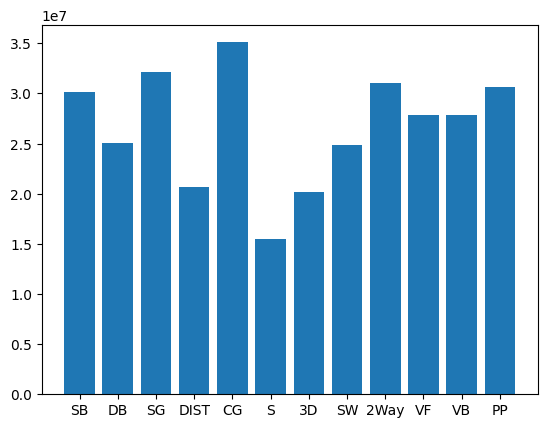

In [ ]:
fig, ax = plt.subplots()
roles = RolesList.keys()
salaries = RolesList.values()
plt.bar(roles, salaries)

*Some players are in multiple roles, there will be some overlap

Defense is harder to track statistically, so defensive roles will be missing certain players (Marcus Smart, Jrue Holiday, etc.)

Combo Guards are very highly valued in the NBA, being able to score, assist, and shoot.
Pure Shooters aren't as valued, since most of them rely on catch-and-shoot/other players setting up their shots for them. Same for 3-and-D players, since they're mostly just shooters who can also play defense well.
Distributors are similar to Pure Shooters. Combo Guards also cover what they do. Distributors usually can't create their own shot, which allows a defense to exploit them similarly to shooters.

As for Frontcourt players (fowards and centers), 2-Way players are the most highly valued. Though 2-Way players include guards, those guards are usually big enough or defensively skilled enough to guard most, if not all positions. Their versatility make these players and their contracts incredibly valuable.